In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import shap

In [8]:
url = 'https://github.com/gonzalezulises/Reto_supermercado/raw/main/BASE%20PROBLEMA_1.xlsx'
base_problema = pd.read_excel(url,sheet_name=None)
df_datos = base_problema['PROBLEMA_1']
df_diccionario = base_problema['DICCIONARIO']

In [9]:
X = df_datos.loc[:, 'p5_1':'p7_7']  
y = df_datos['p8']                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 848it [03:15,  4.15it/s]                                         


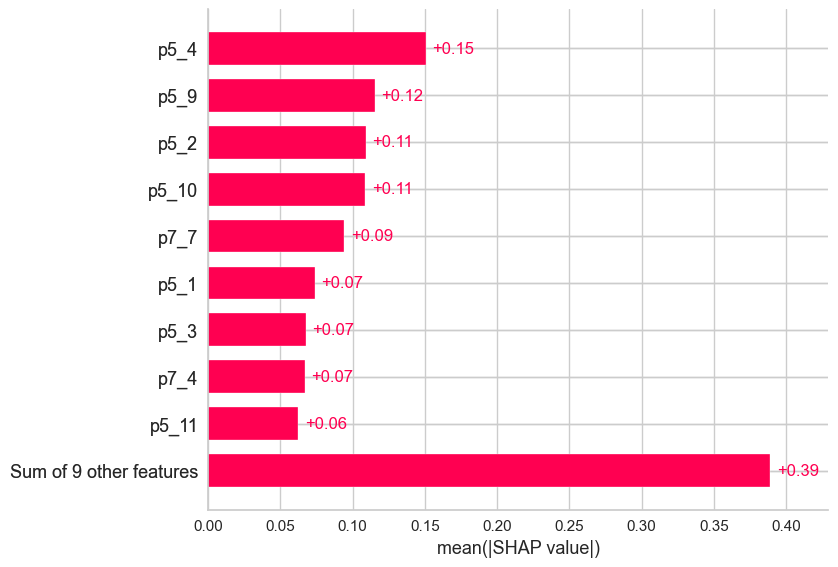

In [11]:
shap.plots.bar(shap_values)

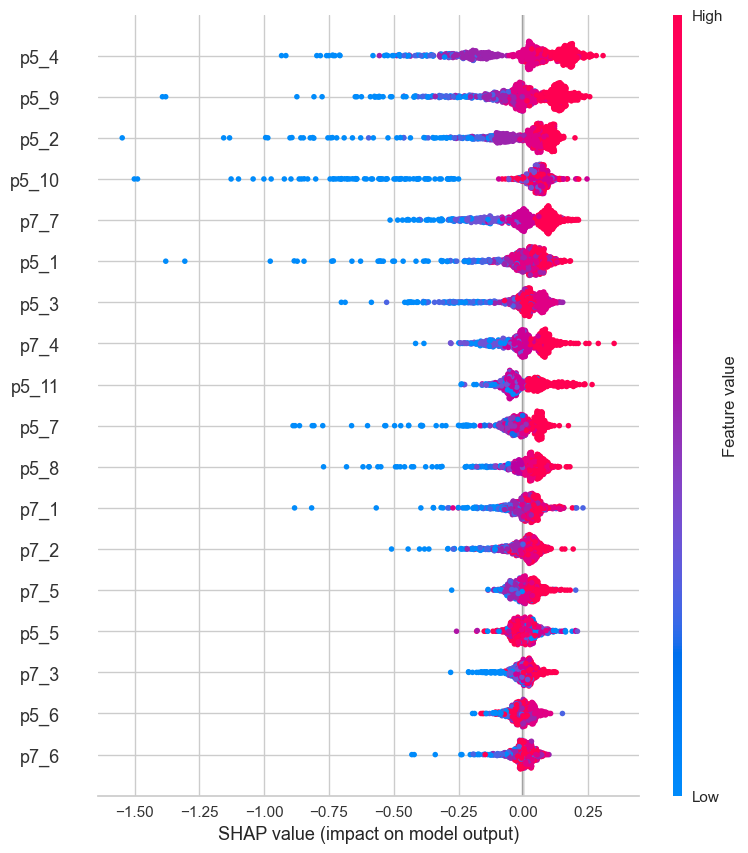

In [12]:
shap.summary_plot(shap_values)

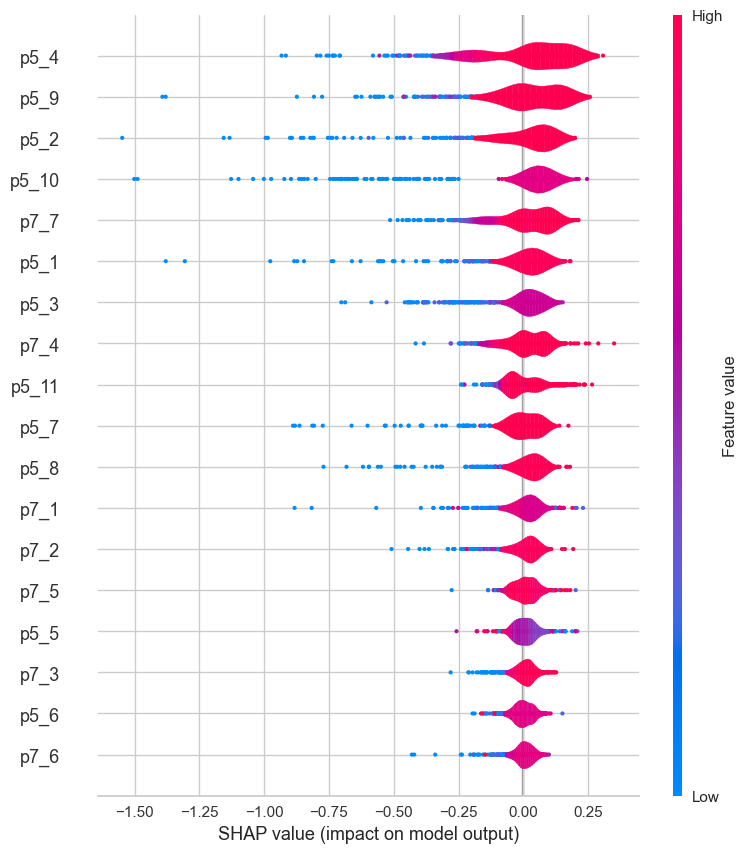

In [13]:
shap.summary_plot(shap_values, plot_type='violin')

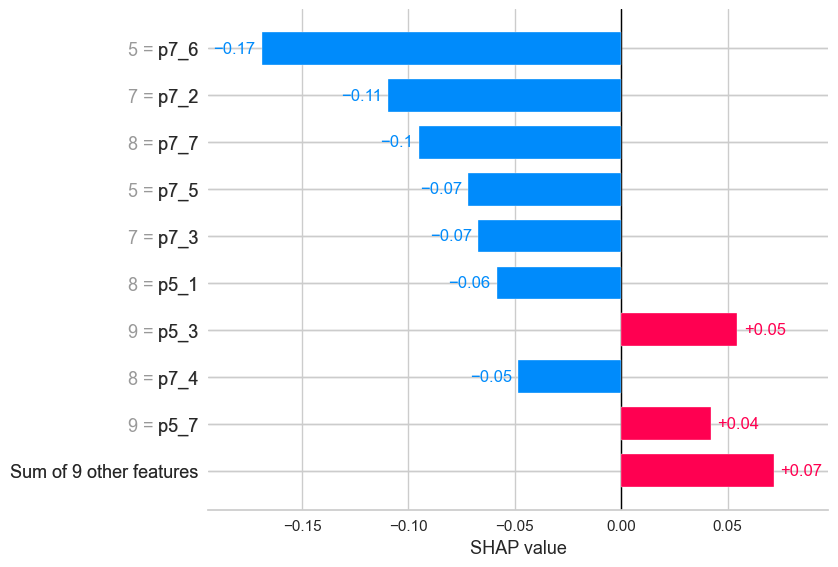

In [14]:
shap.plots.bar(shap_values[0])

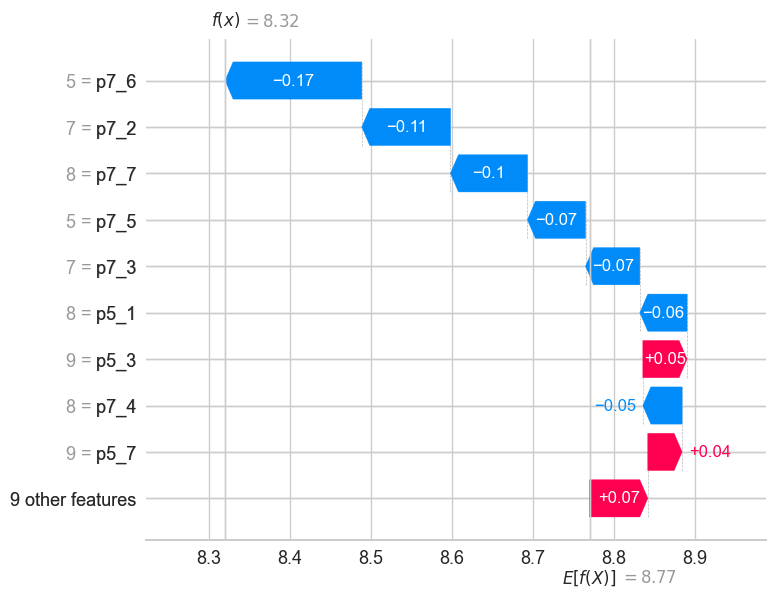

In [15]:
shap.plots.waterfall(shap_values[0])

In [18]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")
